In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target


In [5]:
missing = df.isnull().sum()
print("num of missing values:")
print(missing)

num of missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  
y = df['target']               #

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("num of train:", X_train.shape[0])
print("num of test:", X_test.shape[0])

num of train: 398
num of test: 171


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [11]:
print(X_train.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   398.000000    398.000000      398.000000   398.000000   
mean     14.093847     19.341533       91.698945   650.784171   
std       3.489558      4.500457       24.063881   340.295183   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.662500     15.990000       74.902500   417.100000   
50%      13.275000     18.825000       86.040000   544.050000   
75%      15.772500     21.832500      103.675000   777.400000   
max      25.730000     39.280000      174.200000  2010.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       398.000000        398.000000      398.000000           398.000000   
mean          0.095789          0.103143        0.088446             0.048049   
std           0.013349          0.053362        0.081509             0.038697   
min           0.062510          0.019380        0.000000             0.000000   
25%      

C:\Users\compu maarouf\AppData\Local\Temp\ipykernel_10612\761034197.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


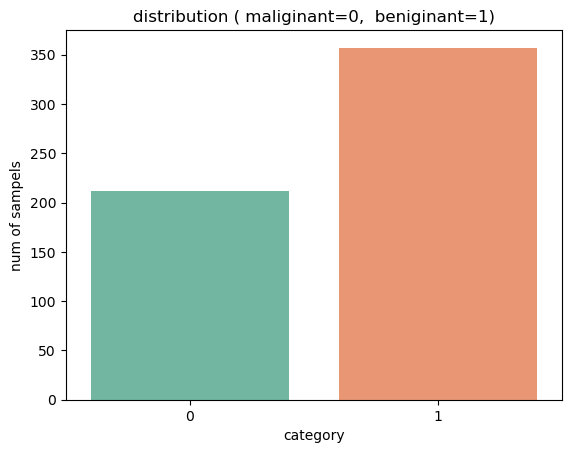

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

title = get_display(arabic_reshaper.reshape('distribution ( maliginant=0,  beniginant=1)'))
xlabel = get_display(arabic_reshaper.reshape('category'))
ylabel = get_display(arabic_reshaper.reshape('num of sampels'))

sns.countplot(x=y, palette='Set2')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

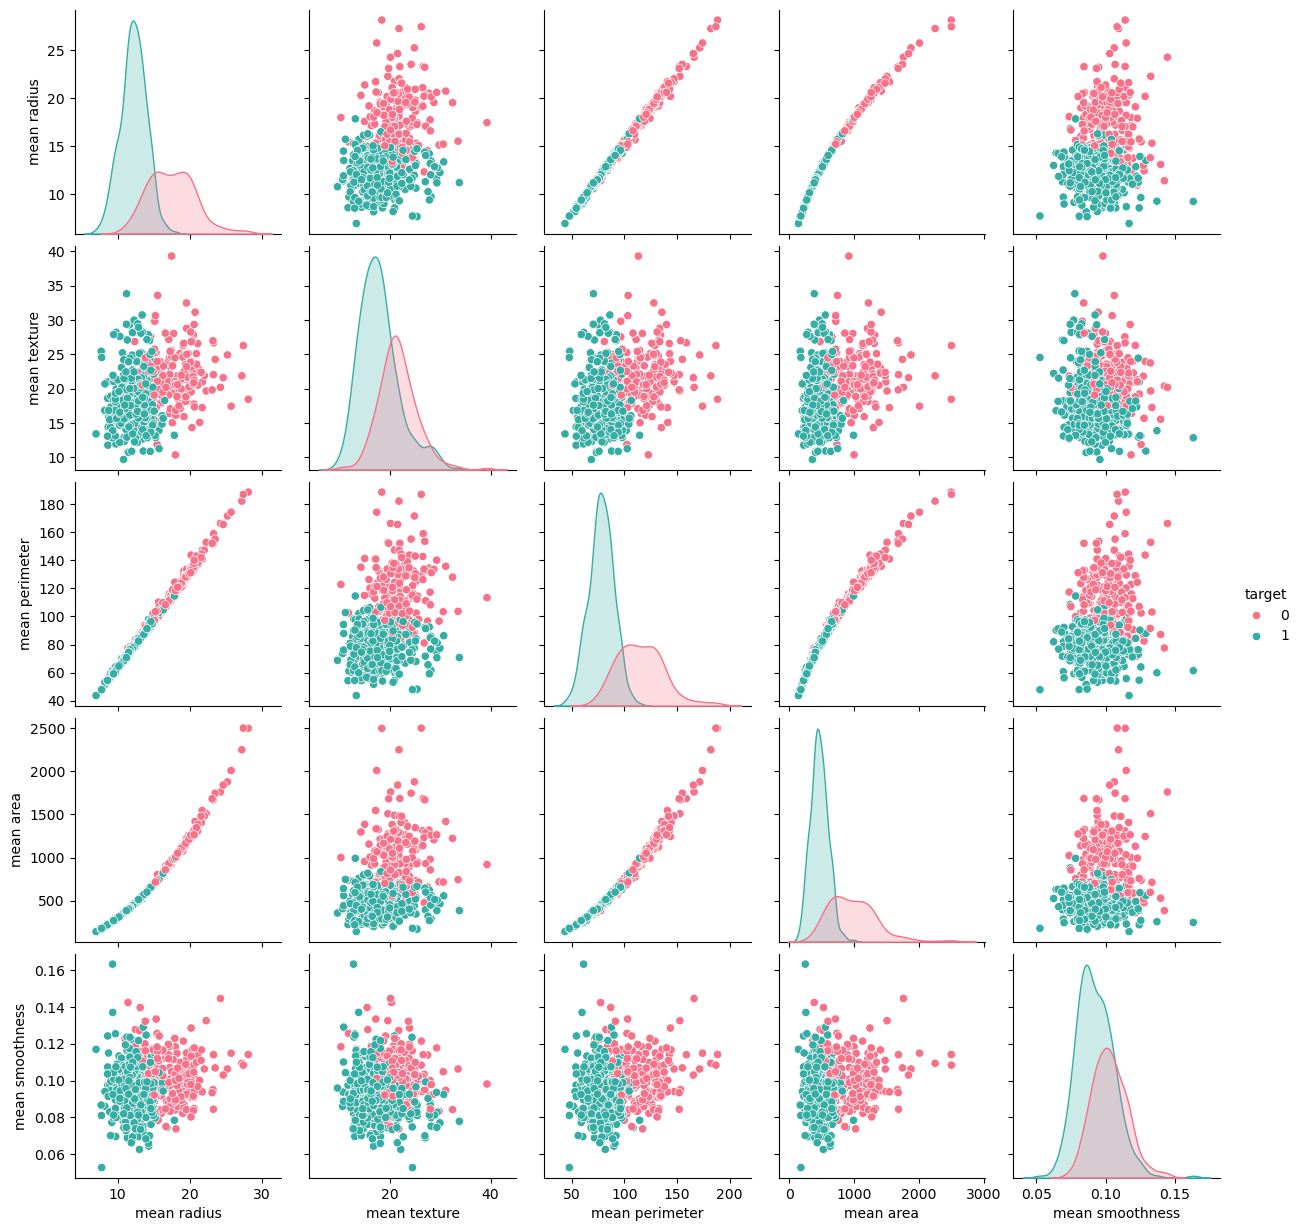

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

df_small = df[sample_features + ['target']]

sns.pairplot(df_small, hue='target', palette='husl')
plt.show()

In [17]:
num_features = df.shape[1] - 1
print("num of features:", num_features)

print("\n types:")
print(df.dtypes)

print("\ndistribution:")
print(df['target'].value_counts())

num of features: 30

 types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points      

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

SVM model training using a kernel: linear
 Accuracy = 0.9825
Ambiguity matrix:
[[ 62   2]
 [  1 106]]


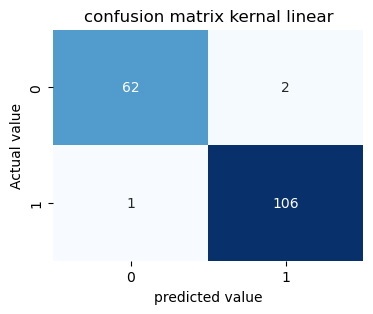

SVM model training using a kernel: poly
 Accuracy = 0.8947
Ambiguity matrix:
[[ 46  18]
 [  0 107]]


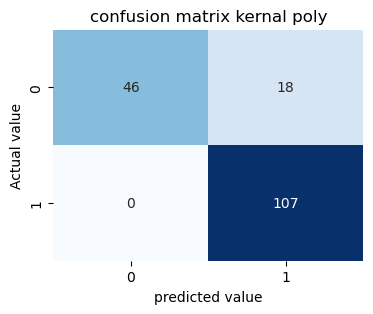

SVM model training using a kernel: rbf
 Accuracy = 0.9766
Ambiguity matrix:
[[ 62   2]
 [  2 105]]


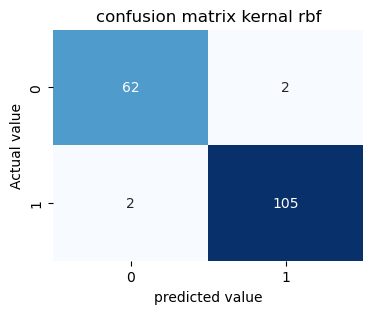

Comparison of results between nucleus types:
Kernel linear: Accuarcy = 0.9825
Kernel poly: Accuarcy = 0.8947
Kernel rbf: Accuarcy = 0.9766


In [25]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    print(f"SVM model training using a kernel: {kernel}")

    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f" Accuracy = {acc:.4f}")
    print("Ambiguity matrix:")
    print(cm)

    results[kernel] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'model': model
    }

    plt.figure(figsize=(4, 3))
    reshaped_title = get_display(arabic_reshaper.reshape(f'confusion matrix kernal {kernel}'))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(reshaped_title)
    plt.xlabel(get_display(arabic_reshaper.reshape('predicted value')))
    plt.ylabel(get_display(arabic_reshaper.reshape('Actual value')))
    plt.show()

print("Comparison of results between nucleus types:")
for kernel, info in results.items():
    print(f"Kernel {kernel}: Accuarcy = {info['accuracy']:.4f}")

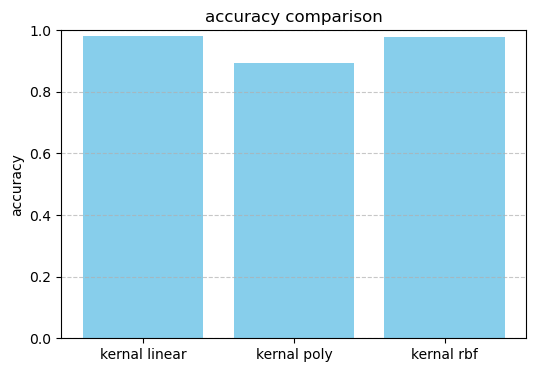

In [27]:
plt.figure(figsize=(6, 4))
kernel_names = list(results.keys())
accuracies = [results[k]['accuracy'] for k in kernel_names]

labels_ar = [get_display(arabic_reshaper.reshape(f"kernal {k}")) for k in kernel_names]
plt.bar(labels_ar, accuracies, color='skyblue')

plt.title(get_display(arabic_reshaper.reshape('accuracy comparison')))
plt.ylabel(get_display(arabic_reshaper.reshape('accuracy')))
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [35]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

D:\NF\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8919 - loss: 0.4200
Test Accuracy: 0.8889


In [39]:
y_pred = model.predict(X_test).round()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[56  8]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.92      0.90      0.91       107

    accuracy                           0.89       171
   macro avg       0.88      0.89      0.88       171
weighted avg       0.89      0.89      0.89       171



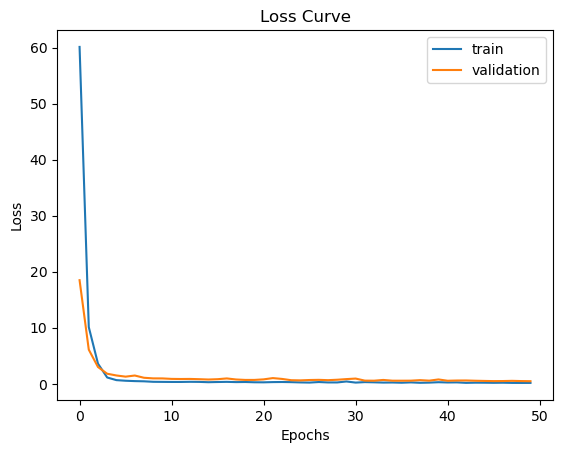

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


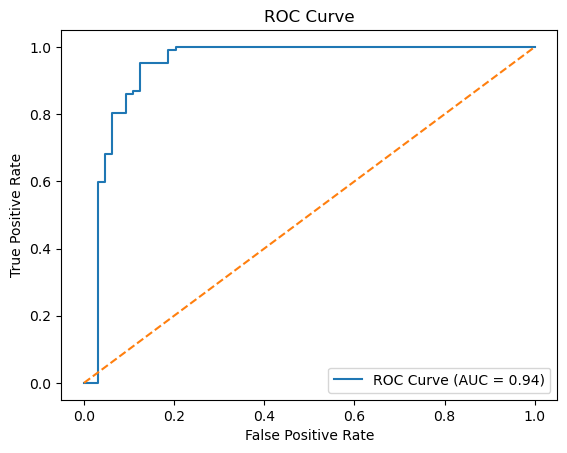

In [43]:
from sklearn.metrics import roc_curve,auc

y_probs = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
nn_model = Sequential()
nn_model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, verbose=0)

D:\NF\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
y_probs = nn_model.predict(X_test).flatten()
y_pred = (y_probs > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [61]:
print("\n Neural Network ")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Neural Network 
Confusion Matrix:
 [[ 50  14]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        64
           1       0.88      0.94      0.91       107

    accuracy                           0.88       171
   macro avg       0.89      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



In [73]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [75]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

D:\NF\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=0)

In [79]:
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_confusion = confusion_matrix(y_test, y_pred_nn)
nn_report = classification_report(y_test, y_pred_nn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [81]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

In [83]:
y_pred_nn_prob = model.predict(X_test).ravel()
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

y_pred_svm_prob = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [87]:
print("neural network findings:")
print(f"accuracy: {nn_accuracy:.4f}")
print("confusion matrix:")
print(nn_confusion)
print("nn_report:")
print(nn_report)

neural network findings:
accuracy: 0.9006
confusion matrix:
[[58  6]
 [11 96]]
nn_report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.94      0.90      0.92       107

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.90       171
weighted avg       0.90      0.90      0.90       171



In [89]:
print("\nsvm findings:")
print(f"accuracy: {svm_accuracy:.4f}")
print("confusion matrix:")
print(svm_confusion)
print("svm report")
print(svm_report)


svm findings:
accuracy: 0.9064
confusion matrix:
[[ 51  13]
 [  3 104]]
svm report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        64
           1       0.89      0.97      0.93       107

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.90       171



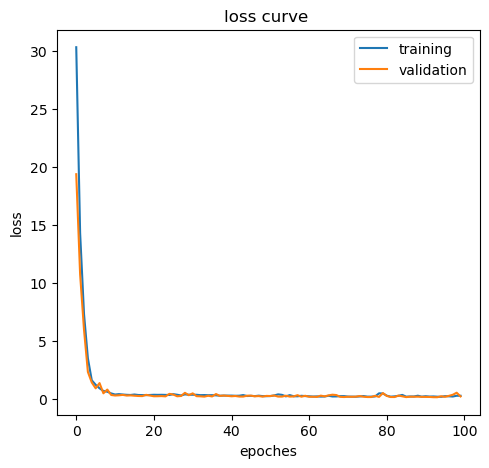

In [91]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss curve ')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend()

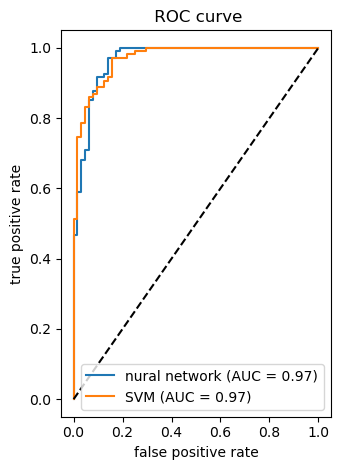

In [95]:
plt.subplot(1, 2, 2)
plt.plot(fpr_nn, tpr_nn, label=f'nural network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(' ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.tight_layout()
plt.show()